# Solar Power Energy Prediction - Data Analysis


## 1.1 Initial Data Exploration

### 1.1.1 Environment Setup

In [8]:
# Import pandas for data manipulation
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import warnings to suppress warning messages
import warnings
# Suppress all warnings for cleaner output
warnings.filterwarnings("ignore")
# Import matplotlib for plotting
from matplotlib import pyplot as plt
# Import seaborn for statistical visualizations
import seaborn as sns
from IPython.display import display
# Display settings for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### 1.1.2 Data Loading

In [9]:
# --- CONFIGURATION ---
FILE_NAME = '../data/solarpowergeneration.csv'
# Load Data
try:
    data = pd.read_csv(FILE_NAME)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: File '{FILE_NAME}' not found. Ensure the file is in the correct directory.")
    exit()

Data loaded successfully.


### 1.1.3 Basic Data Inspection

In [10]:
# Display the entire dataset using head()
data.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [11]:
data.sample(5)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
1711,0.771353,54,27,25.1,2,10.0,80,28.0,29.94,0
515,0.084395,55,29,13.3,3,10.0,69,13.0,30.13,16038
164,0.079452,63,27,14.4,2,10.0,65,20.0,29.97,28277
906,0.434555,47,13,3.6,2,10.0,83,0.0,29.93,0
668,0.208754,56,17,4.0,1,10.0,56,0.0,30.01,21630


In [12]:
# Check the shape of dataset (rows × columns)
data.shape

(2920, 10)

In [13]:
# List all column names
data.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated'], dtype='object')

In [14]:
ranges = data.agg(['min', 'max']).T
ranges['range'] = ranges['max'] - ranges['min']
print(ranges)


                                   min           max        range
distance-to-solar-noon        0.050401      1.141361      1.09096
temperature                  42.000000     78.000000     36.00000
wind-direction                1.000000     36.000000     35.00000
wind-speed                    1.100000     26.600000     25.50000
sky-cover                     0.000000      4.000000      4.00000
visibility                    0.000000     10.000000     10.00000
humidity                     14.000000    100.000000     86.00000
average-wind-speed-(period)   0.000000     40.000000     40.00000
average-pressure-(period)    29.480000     30.530000      1.05000
power-generated               0.000000  36580.000000  36580.00000


In [15]:
# Count total number of columns
len(data.columns)

10

In [16]:
# Display first few rows to understand data structure
data.head(10)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0


### 1.1.4 Data Type Analysis

In [17]:
# Check data types of all columns
data.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [18]:
# Identify numeric columns (int64, float64)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numeric columns: {numeric_cols}")
print(f"Number of numeric columns: {len(numeric_cols)}")

Numeric columns: ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated']
Number of numeric columns: 10


In [19]:
# Identify object columns (strings, categorical)
object_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns: {object_cols}")
print(f"Number of object columns: {len(object_cols)}")

Object columns: []
Number of object columns: 0


In [20]:
# Understand which columns need type conversion
print("Columns contains unique values:")
for col in numeric_cols:
    print(f"{col}: {data[col].nunique()} unique values")

Columns contains unique values:
distance-to-solar-noon: 2660 unique values
temperature: 37 unique values
wind-direction: 35 unique values
wind-speed: 159 unique values
sky-cover: 5 unique values
visibility: 17 unique values
humidity: 75 unique values
average-wind-speed-(period): 32 unique values
average-pressure-(period): 90 unique values
power-generated: 1529 unique values


In [21]:
data["sky-cover"].unique()

array([0, 1, 3, 4, 2])

### 1.1.5 Data Quality Assessment

In [22]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [23]:
# Verify data consistency
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.2 KB


In [24]:
# Look for any obvious data quality issues
data.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


## 1.2 Missing Value Analysis

### 1.2.1 Identify Missing Values

In [25]:
# Count missing values per column
missing_count = data.isna().sum()
print("Missing values per column:")
print(missing_count)

Missing values per column:
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [26]:
# Determine if missing values follow any pattern
# Check if missing values occur together in same rows
print(f"Total rows with any missing value: {data.isna().any(axis=1).sum()}")

Total rows with any missing value: 1


### 1.2.2 Missing Value Decision Strategy

In [27]:
print("Drop the row with missing value.")

Drop the row with missing value.


In [28]:
# Check shape before
data.dropna(inplace=True)
# Check shape after
print(f"Shape after dropping NaNs: {data.shape}")
# Verify clean status
if data.isnull().sum().sum() == 0:
    print("No missing values remain.")

Shape after dropping NaNs: (2919, 10)
No missing values remain.


## 1.3 Outlier Detection and Analysis

### 1.3.1 Understanding Outlier Theory

In [29]:
# Define what constitutes an outlier
print("What is an Outlier?")
print("An outlier is a data point that differs significantly from other observations")
print("It may indicate variability, measurement error, or novel data")

What is an Outlier?
An outlier is a data point that differs significantly from other observations
It may indicate variability, measurement error, or novel data


In [30]:
# Understand IQR (Interquartile Range) method
print("\nIQR Method:")
print("1. Calculate Q1 (25th percentile) and Q3 (75th percentile)")
print("2. IQR = Q3 - Q1")
print("3. Lower Limit = Q1 - 1.5 × IQR")
print("4. Upper Limit = Q3 + 1.5 × IQR")
print("5. Values outside these limits are outliers")


IQR Method:
1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
2. IQR = Q3 - Q1
3. Lower Limit = Q1 - 1.5 × IQR
4. Upper Limit = Q3 + 1.5 × IQR
5. Values outside these limits are outliers


In [31]:
# Know when to remove vs cap outliers
print("\nWhen to Remove vs Cap Outliers:")
print("Remove: When outliers are data errors or not relevant")
print("Cap: When outliers are valid but extreme (preserves data size)")
print("Keep: When outliers contain important information")


When to Remove vs Cap Outliers:
Remove: When outliers are data errors or not relevant
Cap: When outliers are valid but extreme (preserves data size)
Keep: When outliers contain important information


### 1.4.2 Calculate Quartiles for a Column

In [32]:
data.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated'], dtype='object')

In [33]:
# Calculate Q1 (25th percentile)
q1 = data["average-wind-speed-(period)"].quantile(0.25)
print(f"Q1 (25th percentile): {q1}")

Q1 (25th percentile): 5.0


In [34]:
# Calculate Q3 (75th percentile)
q3 = data["average-wind-speed-(period)"].quantile(0.75)
print(f"Q3 (75th percentile): {q3}")

Q3 (75th percentile): 15.0


In [35]:
# Understand quartile distribution
print("\nQuartile Distribution:")
print(f"Q1 (25%): {q1} - 25% of data below this value")
print(f"Q2 (50%): {data['average-wind-speed-(period)'].quantile(0.50)} - Median")
print(f"Q3 (75%): {q3} - 75% of data below this value")


Quartile Distribution:
Q1 (25%): 5.0 - 25% of data below this value
Q2 (50%): 9.0 - Median
Q3 (75%): 15.0 - 75% of data below this value


### 1.4.3 Calculate IQR

In [36]:
# Compute IQR = Q3 - Q1
iqr = q3 - q1
print(f"IQR (Interquartile Range): {iqr}")

IQR (Interquartile Range): 10.0


In [37]:
# Understand IQR represents middle 50% of data
print(f"\nIQR represents the middle 50% of the data")
print(f"Range from {q1} to {q3}")
print(f"Spread: {iqr}")


IQR represents the middle 50% of the data
Range from 5.0 to 15.0
Spread: 10.0


### 1.4.4 Define Outlier Boundaries

In [38]:
# Calculate upper limit
up = q3 + 1.5 * iqr
print(f"Upper limit: {up}")

Upper limit: 30.0


In [39]:
# Calculate lower limit
low = q1 - 1.5 * iqr
print(f"Lower limit: {low}")

Lower limit: -10.0


In [40]:
# Understand 1.5 × IQR is standard multiplier (can be adjusted)
print("\n1.5 × IQR is the standard multiplier (Tukey's method)")
print("Can be adjusted: 3 × IQR for extreme outliers only")
print(f"Values < {low} or > {up} are considered outliers")


1.5 × IQR is the standard multiplier (Tukey's method)
Can be adjusted: 3 × IQR for extreme outliers only
Values < -10.0 or > 30.0 are considered outliers


### 1.4.5 Identify Outlier Records

In [41]:
# Filter records with outliers
outliers = data[(data["average-wind-speed-(period)"] < low) | (data["average-wind-speed-(period)"] > up)]
# Display outlier records
print("Outlier records for average-wind-speed-(period):")
outliers

Outlier records for average-wind-speed-(period):


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
1461,0.405248,57,19,20.8,2,10.0,67,33.0,29.89,10489
1646,0.544474,55,27,16.1,2,10.0,83,31.0,30.07,350
1694,0.537037,57,27,12.6,2,10.0,62,31.0,29.97,716
1708,0.061761,54,27,25.1,3,10.0,75,32.0,29.96,33463
1709,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575
1797,0.292249,55,27,19.6,3,10.0,53,31.0,30.00,17948
1804,0.063371,50,29,26.6,1,10.0,49,40.0,29.94,36580
1805,0.291508,50,29,26.6,2,10.0,61,39.0,29.91,7428
1806,0.519645,50,29,26.6,2,10.0,68,32.0,29.92,41
1883,0.157635,53,27,24.4,2,10.0,59,31.0,30.05,29986


In [42]:
# Count number of outliers
outlier_count = len(outliers)
print(f"Number of outliers in average-wind-speed-(period): {outlier_count}")
print(f"Percentage of outliers: {(outlier_count / len(data)) * 100:.2f}%")

Number of outliers in average-wind-speed-(period): 25
Percentage of outliers: 0.86%


### 1.4.6 Get Outlier Indices

In [43]:
# Extract indices of outlier rows
outlier_indices = data[(data["average-wind-speed-(period)"] < low) | (data["average-wind-speed-(period)"] > up)].index
print(f"Outlier indices: {outlier_indices.tolist()}")

Outlier indices: [1461, 1646, 1694, 1708, 1709, 1797, 1804, 1805, 1806, 1883, 1884, 1886, 1895, 2013, 2020, 2021, 2045, 2085, 2332, 2333, 2334, 2336, 2343, 2344, 2765]


In [44]:
# Store indices for potential removal
average_wind_speed_period_outlier_idx = outlier_indices
print(f"Stored {len(average_wind_speed_period_outlier_idx)} outlier indices")

Stored 25 outlier indices


### 1.4.7 Check if Outliers Exist (Boolean)

In [45]:
# Use .any(axis=None) to return True/False
has_outliers = data[(data["average-wind-speed-(period)"] > up) | (data["average-wind-speed-(period)"] < low)].any(axis=None)
print(f"Does average-wind-speed-(period) have outliers? {has_outliers}")

Does average-wind-speed-(period) have outliers? True


In [46]:
# Quick check without displaying data
print("Quick boolean check for outliers:")
print(f"average-wind-speed-(period): {has_outliers}")

Quick boolean check for outliers:
average-wind-speed-(period): True


### 1.4.8 Create outlier() Function

In [47]:
# Define outlier function
def outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Calculate outlier limits using IQR method.
    
    Parameters:
    - dataframe: Input DataFrame
    - col_name: Column name to check
    - q1: First quartile (default=0.25)
    - q3: Third quartile (default=0.75)
    
    Returns:
    - Tuple of (low_limit, up_limit)
    """
    # Calculate quartiles
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    # Calculate IQR
    interquantile_range = quartile3 - quartile1
    # Calculate limits
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    # Return as tuple
    return low_limit, up_limit

In [48]:
# Test outlier function - reusable for any column
print("Testing outlier function:")
print(f"average-wind-speed-(period): {outlier(data, 'average-wind-speed-(period)')}")

Testing outlier function:
average-wind-speed-(period): (np.float64(-10.0), np.float64(30.0))


### 1.4.9 Create check_outlier() Function

In [49]:
# Define check_outlier function
def check_outlier(dataframe, col_name):
    """
    Check if outliers exist in a column.
    
    Parameters:
    - dataframe: Input DataFrame
    - col_name: Column name to check
    
    Returns:
    - True if outliers exist, False otherwise
    """
    # Get outlier limits
    low_limit, up_limit = outlier(dataframe, col_name)
    # Check if any values outside limits
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [50]:
# Test check_outlier function - quick boolean check
print("Testing check_outlier function:")
print(f"average-wind-speed-(period) has outliers: {check_outlier(data, 'average-wind-speed-(period)')}")

Testing check_outlier function:
average-wind-speed-(period) has outliers: True


### 1.4.10 Test Outlier Functions on Multiple Columns

In [51]:
# Test on player_one_age
print(f"average-wind-speed-(period) outliers: {check_outlier(data, 'average-wind-speed-(period)')}")
print(f"average-wind-speed-(period) limits: {outlier(data, 'average-wind-speed-(period)')}")

average-wind-speed-(period) outliers: True
average-wind-speed-(period) limits: (np.float64(-10.0), np.float64(30.0))


In [52]:
data.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated'], dtype='object')

In [53]:
# Test on player_two_age
print(f"humidity outliers: {check_outlier(data, 'humidity')}")
print(f"humidity limits: {outlier(data, 'humidity')}")

humidity outliers: True
humidity limits: (np.float64(36.5), np.float64(112.5))


In [54]:
# Test on average-pressure-(period) (if exists)
if 'average-pressure-(period)' in data.columns:
    print(f"average-pressure-(period) outliers: {check_outlier(data, 'average-pressure-(period)')}")
    print(f"average-pressure-(period): {outlier(data, 'average-pressure-(period)')}")

average-pressure-(period) outliers: True
average-pressure-(period): (np.float64(29.635000000000005), np.float64(30.394999999999996))


In [55]:
# Print results for verification
print("Outlier check complete for sample columns")

Outlier check complete for sample columns


### 1.4.11 Create detect_outliers() Function

In [56]:
# Define detect_outliers function
def detect_outliers(dataframe, col_name, return_index=False):
    """
    Detect and display outlier records.
    
    Parameters:
    - dataframe: Input DataFrame
    - col_name: Column name to check
    - return_index: If True, return outlier indices (default=False)
    
    Returns:
    - Outlier indices if return_index=True
    """
    # Get low and upper limits
    low, up = outlier(dataframe, col_name)
    # Filter outlier records
    outlier_df = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]
    
    # If outliers > 10, show only head()
    if outlier_df.shape[0] > 10:
        display(outlier_df.head())
        print(f"... and {outlier_df.shape[0] - 10} more outliers")
    # Otherwise show all outliers
    else:
        display(outlier_df)

    # Optionally return outlier indices
    if return_index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [57]:
# Test detect_outliers function - provides detailed outlier information
print("Detecting outliers for average-wind-speed-(period):")
outlier_idx = detect_outliers(data, "average-wind-speed-(period)", return_index=True)
print(f"\nTotal outliers found: {len(outlier_idx)}")

Detecting outliers for average-wind-speed-(period):


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
1461,0.405248,57,19,20.8,2,10.0,67,33.0,29.89,10489
1646,0.544474,55,27,16.1,2,10.0,83,31.0,30.07,350
1694,0.537037,57,27,12.6,2,10.0,62,31.0,29.97,716
1708,0.061761,54,27,25.1,3,10.0,75,32.0,29.96,33463
1709,0.298292,54,27,25.1,2,10.0,64,38.0,29.89,18575


... and 15 more outliers

Total outliers found: 25


### 1.4.12 Systematically Check All Numerical Columns

In [58]:
# Loop through all numerical columns
print("Outlier Status for All Numerical Columns:")
print("=" * 60)
for col in numeric_cols:
    # Print column name and outlier status (True/False)
    has_outlier = check_outlier(data, col)
    status = "✓ Has outliers" if has_outlier else "✗ No outliers"
    print(f"{col}: {status}")

Outlier Status for All Numerical Columns:
distance-to-solar-noon: ✗ No outliers
temperature: ✗ No outliers
wind-direction: ✓ Has outliers
wind-speed: ✓ Has outliers
sky-cover: ✗ No outliers
visibility: ✓ Has outliers
humidity: ✓ Has outliers
average-wind-speed-(period): ✓ Has outliers
average-pressure-(period): ✓ Has outliers
power-generated: ✓ Has outliers


In [59]:
# Create comprehensive outlier report
outlier_report = {}
for col in numeric_cols:
    # Check if has outliers
    has_outlier = check_outlier(data, col)
    # Get limits
    low_lim, up_lim = outlier(data, col)
    # Count outliers
    outlier_count = len(data[(data[col] < low_lim) | (data[col] > up_lim)])
    # Store in report
    outlier_report[col] = {
        'has_outliers': has_outlier,
        'count': outlier_count,
        'percentage': (outlier_count / len(data)) * 100,
        'lower_limit': low_lim,
        'upper_limit': up_lim
    }

# Display report as DataFrame
outlier_report_df = pd.DataFrame(outlier_report).T
# Sort by 'percentage' column in descending order (high to low)
outlier_report_df = outlier_report_df.sort_values(by='percentage', ascending=False)
print("\nComprehensive Outlier Report:")
outlier_report_df


Comprehensive Outlier Report:


,has_outliers,count,percentage,lower_limit,upper_limit
wind-direction,True,527,18.054128,19.0,35.0
visibility,True,428,14.662556,10.0,10.0
power-generated,True,107,3.665639,-19087.5,31812.5
humidity,True,83,2.84344,36.5,112.5
wind-speed,True,40,1.370332,-3.15,22.85
average-pressure-(period),True,31,1.062008,29.635,30.395
average-wind-speed-(period),True,25,0.856458,-10.0,30.0
distance-to-solar-noon,False,0,0.0,-0.529187,1.500807
temperature,False,0,0.0,38.0,78.0
sky-cover,False,0,0.0,-2.0,6.0


### 1.4.13 Analyze Outlier Context

In [60]:
# Consider domain knowledge
print("\nDomain Knowledge Considerations:")
print("""
Visibility:
Low visibility values (fog/mist) are real weather data.
DO NOT remove them, as they directly impact solar power.

Wind Speed:
High wind speeds are real.
Keep them unless they are physically impossible (e.g., 500 m/s).

Contextual Logic Check (Important):

Scenario A – Midnight Sun Error:
Solar power cannot be generated at night.
distance_to_solar_noon represents time of day (0 = noon).
High values indicate nighttime, so power_generated must be 0.

Scenario B – Broken Panel Error:
If distance_to_solar_noon is near 0 (noon),
sky_cover is 0 (clear sky),
and power_generated is 0,
this likely indicates a sensor failure or system downtime.
These rows should be removed.
""")


Domain Knowledge Considerations:

Visibility:
Low visibility values (fog/mist) are real weather data.
DO NOT remove them, as they directly impact solar power.

Wind Speed:
High wind speeds are real.
Keep them unless they are physically impossible (e.g., 500 m/s).

Contextual Logic Check (Important):

Scenario A – Midnight Sun Error:
Solar power cannot be generated at night.
distance_to_solar_noon represents time of day (0 = noon).
High values indicate nighttime, so power_generated must be 0.

Scenario B – Broken Panel Error:
If distance_to_solar_noon is near 0 (noon),
sky_cover is 0 (clear sky),
and power_generated is 0,
this likely indicates a sensor failure or system downtime.
These rows should be removed.



In [61]:
# --- LOGIC CHECK 1: NIGHT TIME GENERATION ---
# "Night" is roughly defined by high distance to solar noon.
# Let's assume distance > 1.5 radians is "dark" (approx 6 hours from noon).
# If power > 0 during this time, it's suspicious.

night_threshold = 1.2  
night_power_outliers = data[(data['distance-to-solar-noon'] > night_threshold) & (data['power-generated'] > 10)]

print(f"Suspicious Night Generation Count: {len(night_power_outliers)}")
if len(night_power_outliers) > 0:
    print(night_power_outliers[['distance_to_solar_noon', 'power-generated']].head())


# --- LOGIC CHECK 2: DAY TIME ZERO GENERATION ---
# If it is NOON (distance < 0.2) and CLEAR (sky_cover = 0) 
# and POWER is 0, something is wrong with the sensor.

day_failure_outliers = data[
    (data['distance-to-solar-noon'] < 0.5) & 
    (data['sky-cover'] == 0) & 
    (data['power-generated'] == 0)
]

print(f"\nSuspicious Zero Power at Noon Count: {len(day_failure_outliers)}")
if len(day_failure_outliers) > 0:
    print(day_failure_outliers[['distance-to-solar-noon', 'sky-cover', 'power-generated']].head())

Suspicious Night Generation Count: 0

Suspicious Zero Power at Noon Count: 13
     distance-to-solar-noon  sky-cover  power-generated
322                0.434018          0                0
323                0.170088          0                0
325                0.357771          0                0
330                0.435294          0                0
331                0.170588          0                0


In [62]:
print(f"Wind Direction Range: {data['wind-direction'].min()} - {data['wind-direction'].max()}")

Wind Direction Range: 1 - 36


In [63]:
print("""
    Wind Direction data uses a 1-36 scale to represent a 360-degree compass.
    This creates a fatal logical error for any regression model:
    - The model sees '1' (North-East) and '36' (North) as opposites (distance = 35).
    - In reality, they are physical neighbors (distance = 1 sector).

    Feature Engineering is requried to mathematically prove to the model that 36 follows 1.
    By encoding Wind Direction column to Sine and Cosine coordinates (Cyclic Encoding).
    """)


    Wind Direction data uses a 1-36 scale to represent a 360-degree compass.
    This creates a fatal logical error for any regression model:
    - The model sees '1' (North-East) and '36' (North) as opposites (distance = 35).
    - In reality, they are physical neighbors (distance = 1 sector).

    Feature Engineering is requried to mathematically prove to the model that 36 follows 1.
    By encoding Wind Direction column to Sine and Cosine coordinates (Cyclic Encoding).
    


In [64]:
print("""
1. Statistical Outliers
- Wind direction value range 1-36 which       
- Keep extreme humidity, wind, and visibility (real weather events).
- Remove only impossible values (e.g., negative wind speed, negative pressure).

2. Contextual Outliers
- Remove daytime zero-generation rows (caused by faulty equipment).
- Keep nighttime zero-generation rows (no sun = no power).
""")


1. Statistical Outliers
- Wind direction value range 1-36 which       
- Keep extreme humidity, wind, and visibility (real weather events).
- Remove only impossible values (e.g., negative wind speed, negative pressure).

2. Contextual Outliers
- Remove daytime zero-generation rows (caused by faulty equipment).
- Keep nighttime zero-generation rows (no sun = no power).



## 1.5 Exploratory Data Analysis

### 1.5.1 Histogram Visualization for Data Distribution

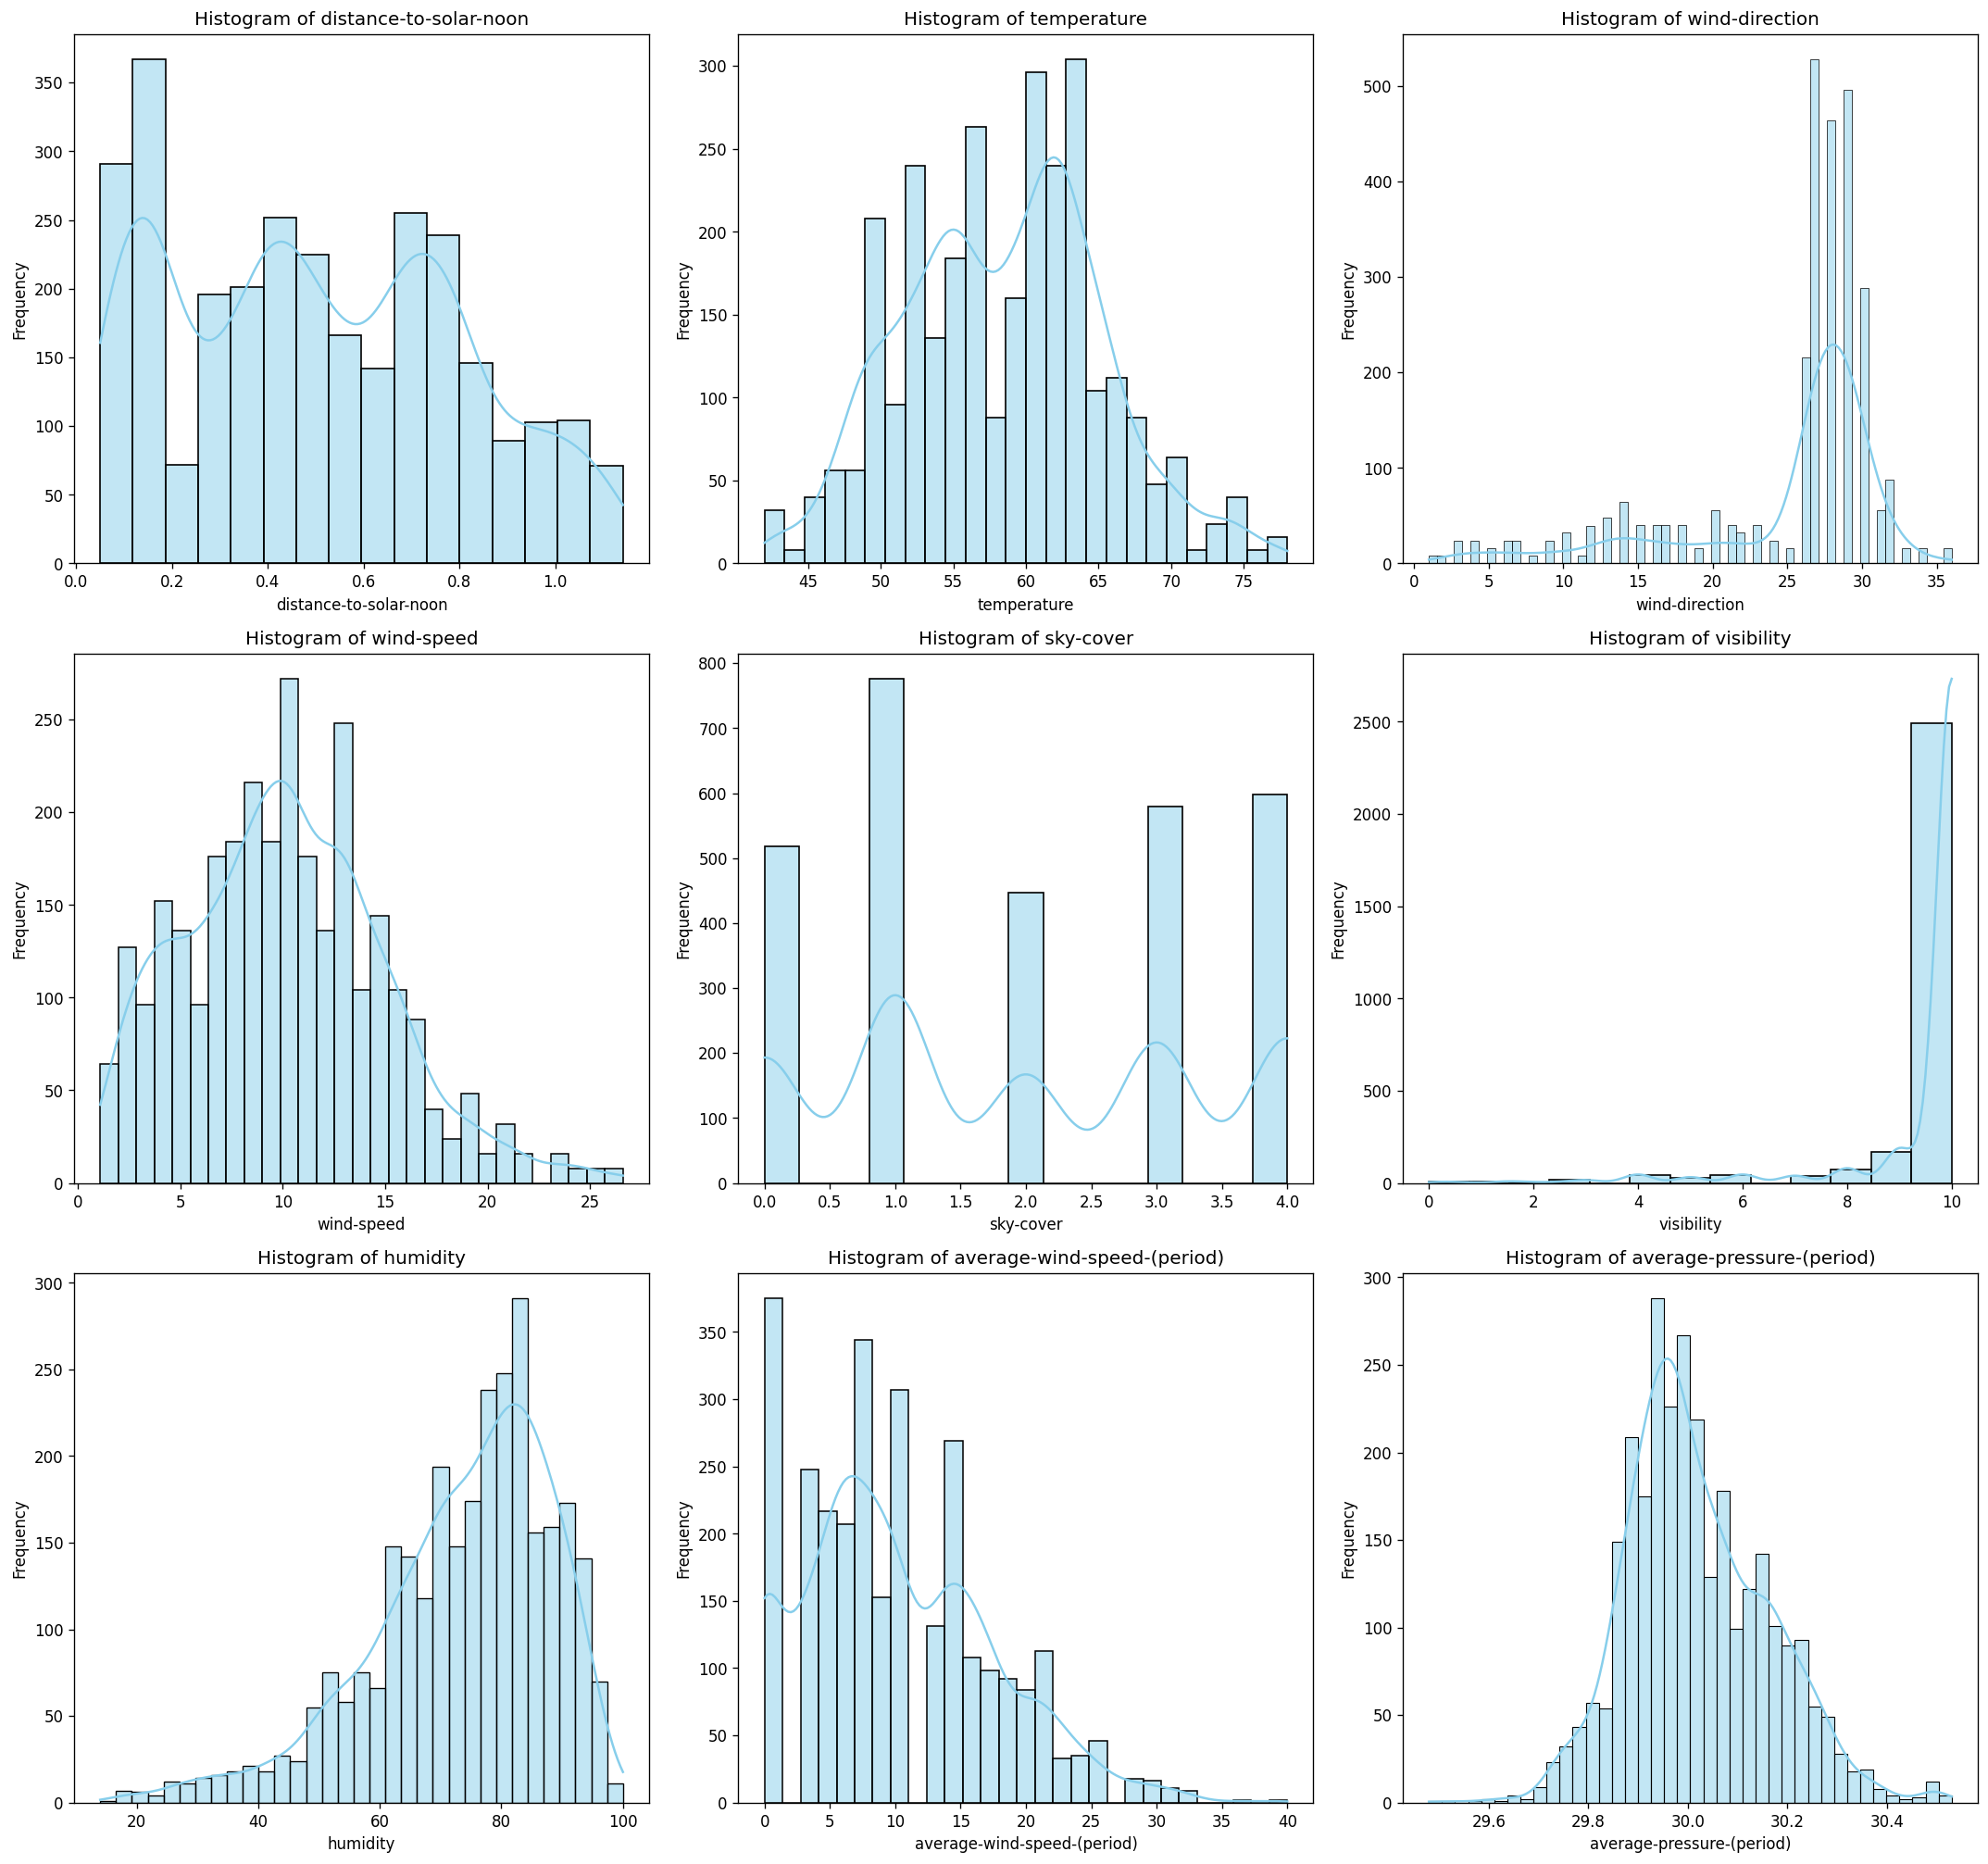

In [78]:
#Plot Histograms for feature cols
feature_cols = data.drop(columns=['power-generated']).columns

# Create subplots
fig, axes = plt.subplots(
    nrows=4,
    ncols=3,
    figsize=(18, 22),
    dpi=120
)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(feature_cols):
    sns.histplot(
        data=data,
        x=col,
        kde=True,
        color='skyblue',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove empty subplots if any
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


The histograms show that most weather variables exhibit stable and well-defined distributions, with temperature and pressure appearing approximately normal, while wind-related variables are skewed. Overall, extreme values are infrequent, indicating generally consistent atmospheric conditions across the dataset.


## 1.5.2 Boxplot Visualization for Outliers

In [66]:
data.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated'], dtype='object')

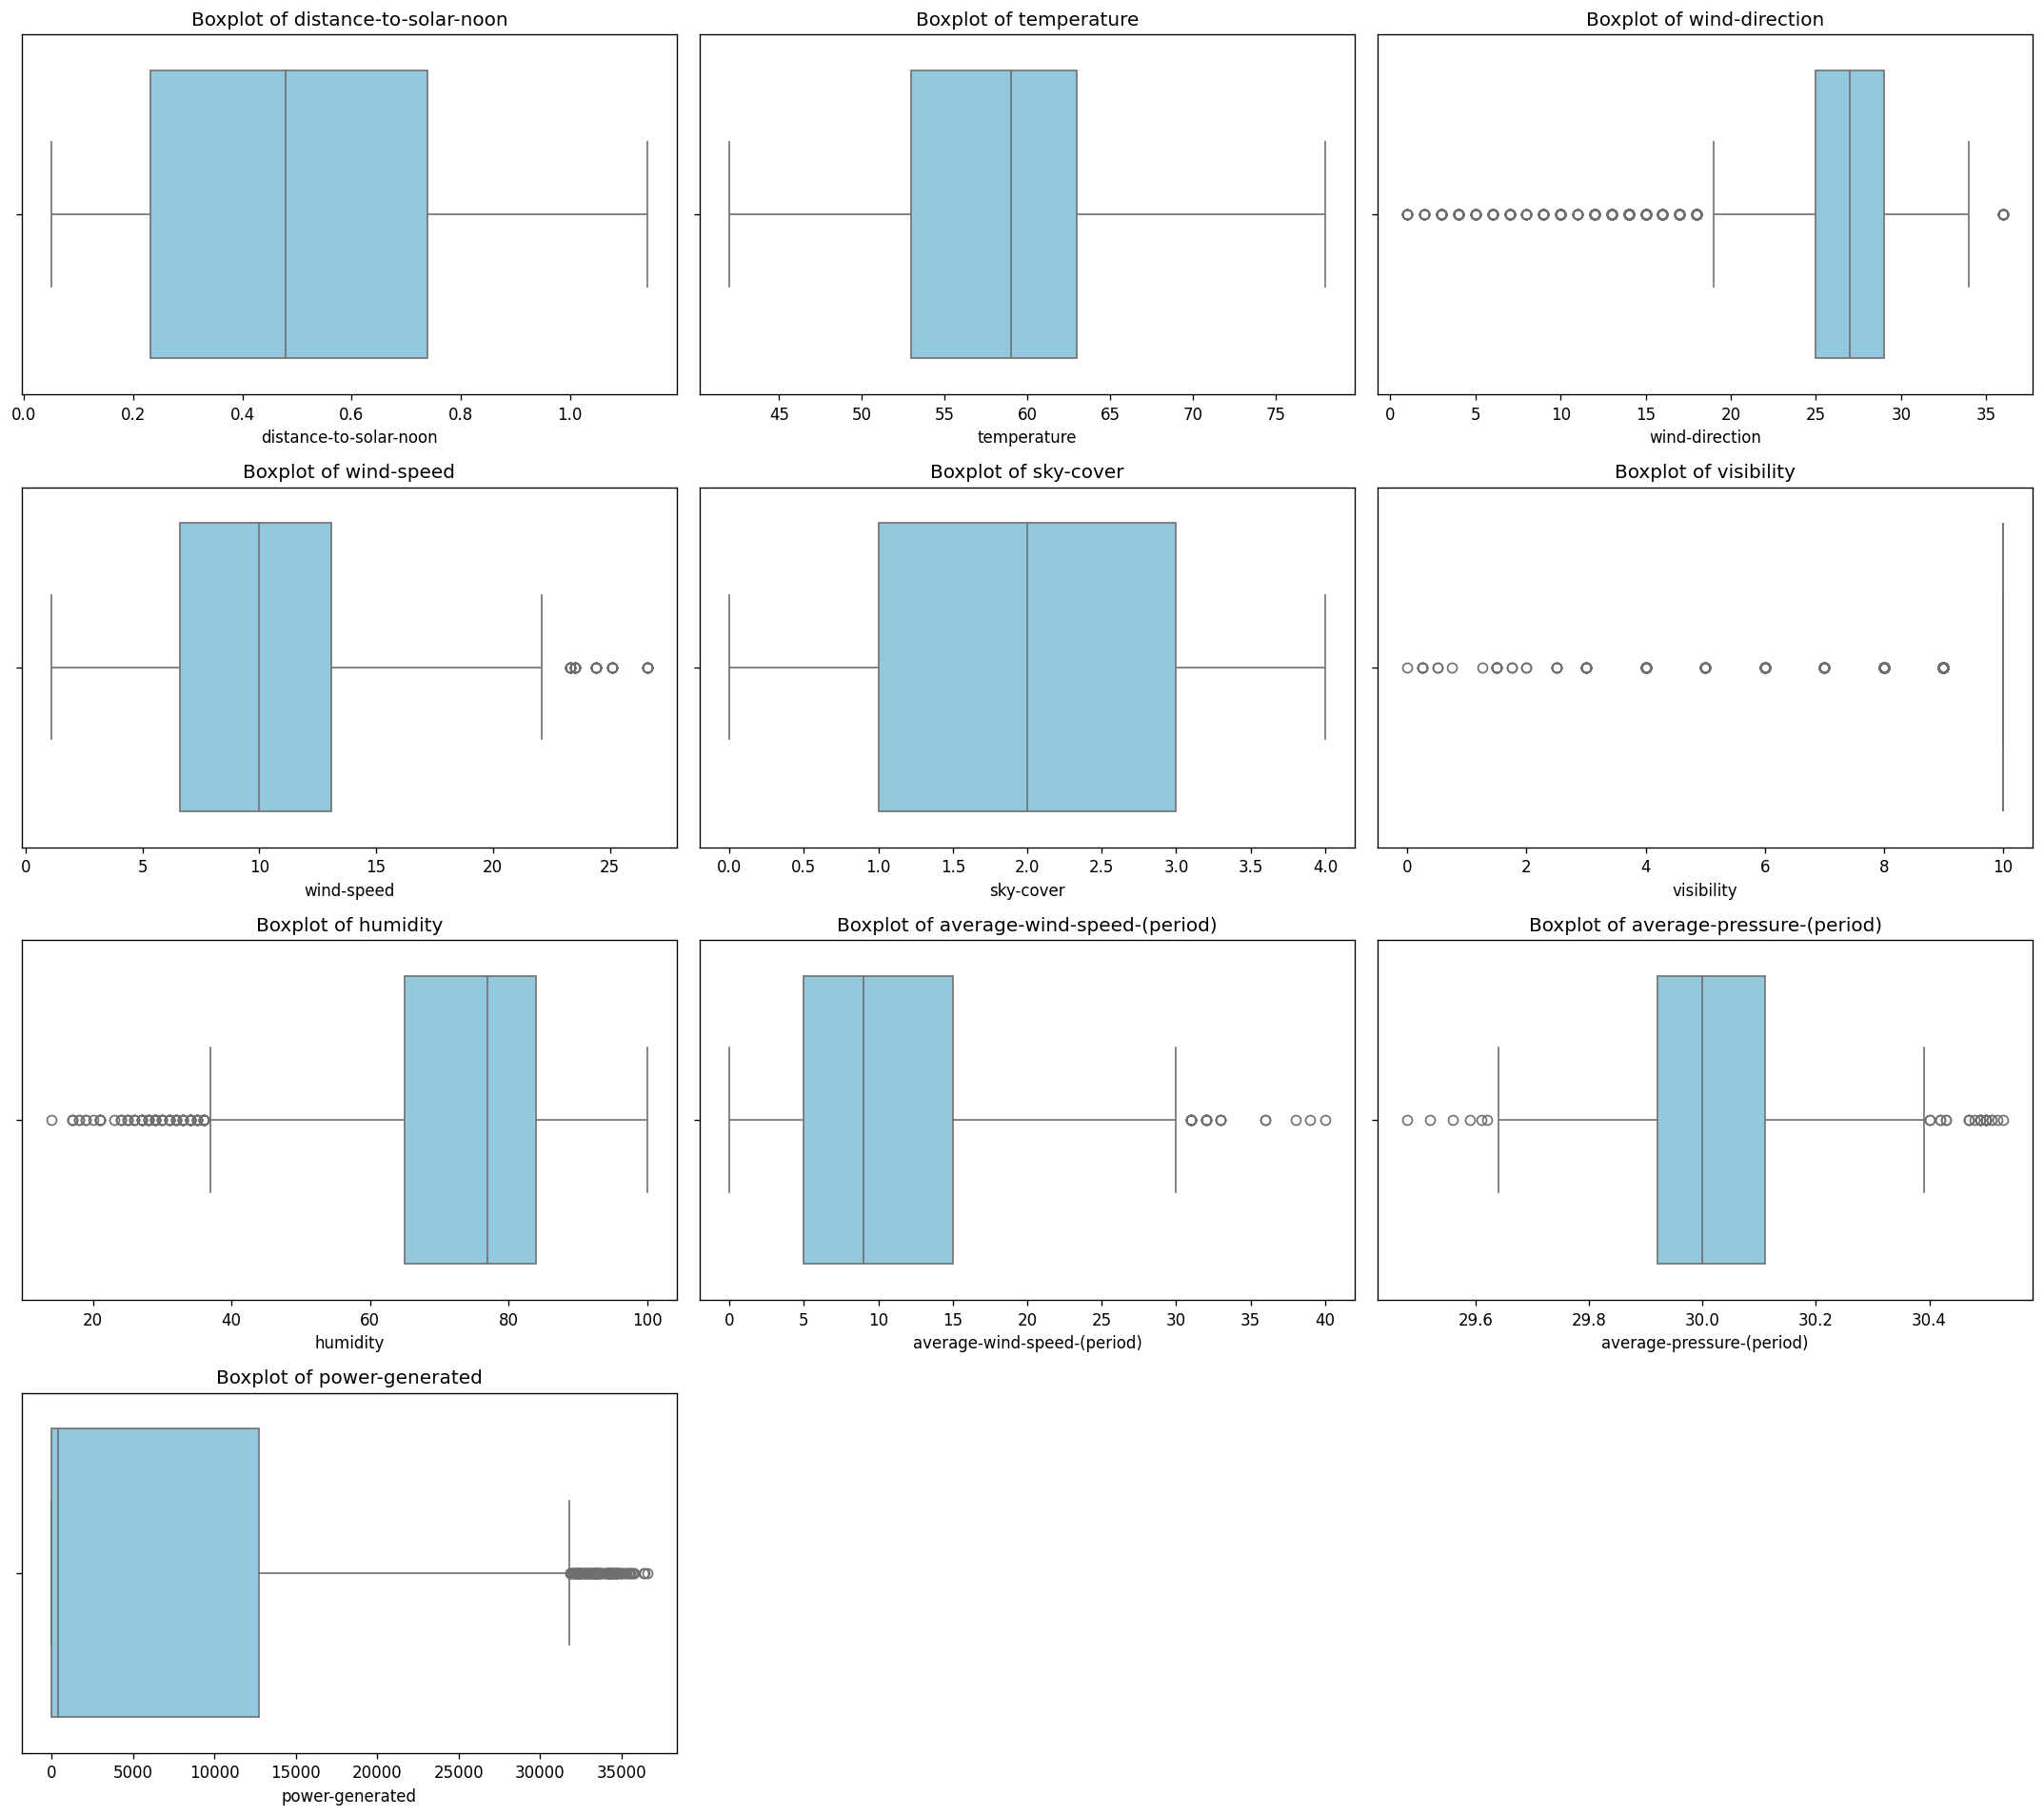

In [79]:
import math

n_cols = 3  # Number of columns in the grid
n_features = len(data.columns)
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows), dpi=120)
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(data=data, x=col, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

# Remove any extra axes
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The boxplots indicate that most variables have moderate variability with clearly defined medians, while wind-related variables, visibility, and humidity show the presence of several outliers. Overall, the data suggests generally stable conditions with occasional extreme values that may represent rare weather events.


## 1.5.3 Correlation Analysis

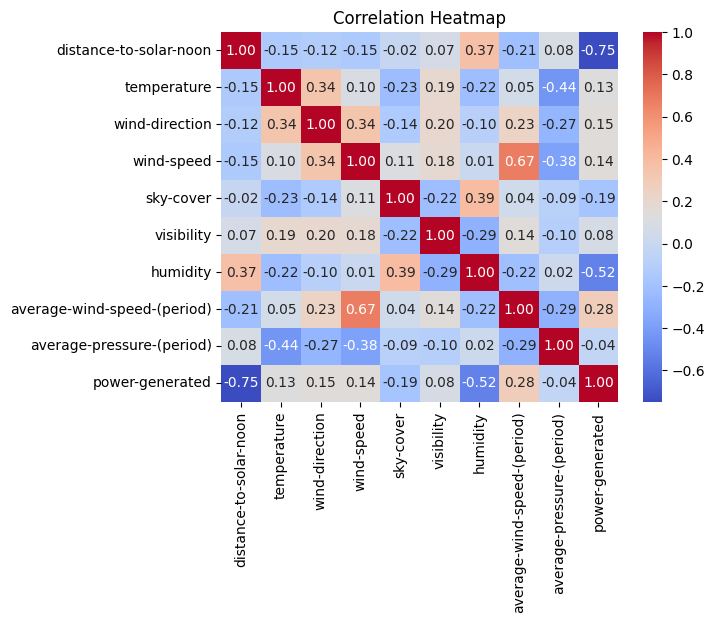

In [68]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows that power generation is strongly negatively correlated with distance to solar noon and humidity, indicating higher power output near solar noon and under drier conditions. Wind speed is mildy correlated with average wind speed, while most other variables exhibit weak to moderate correlations, suggesting limited multicollinearity.


## 1.5.4 Feature Vs Target Varialbe Relationship (Scatter Plot)

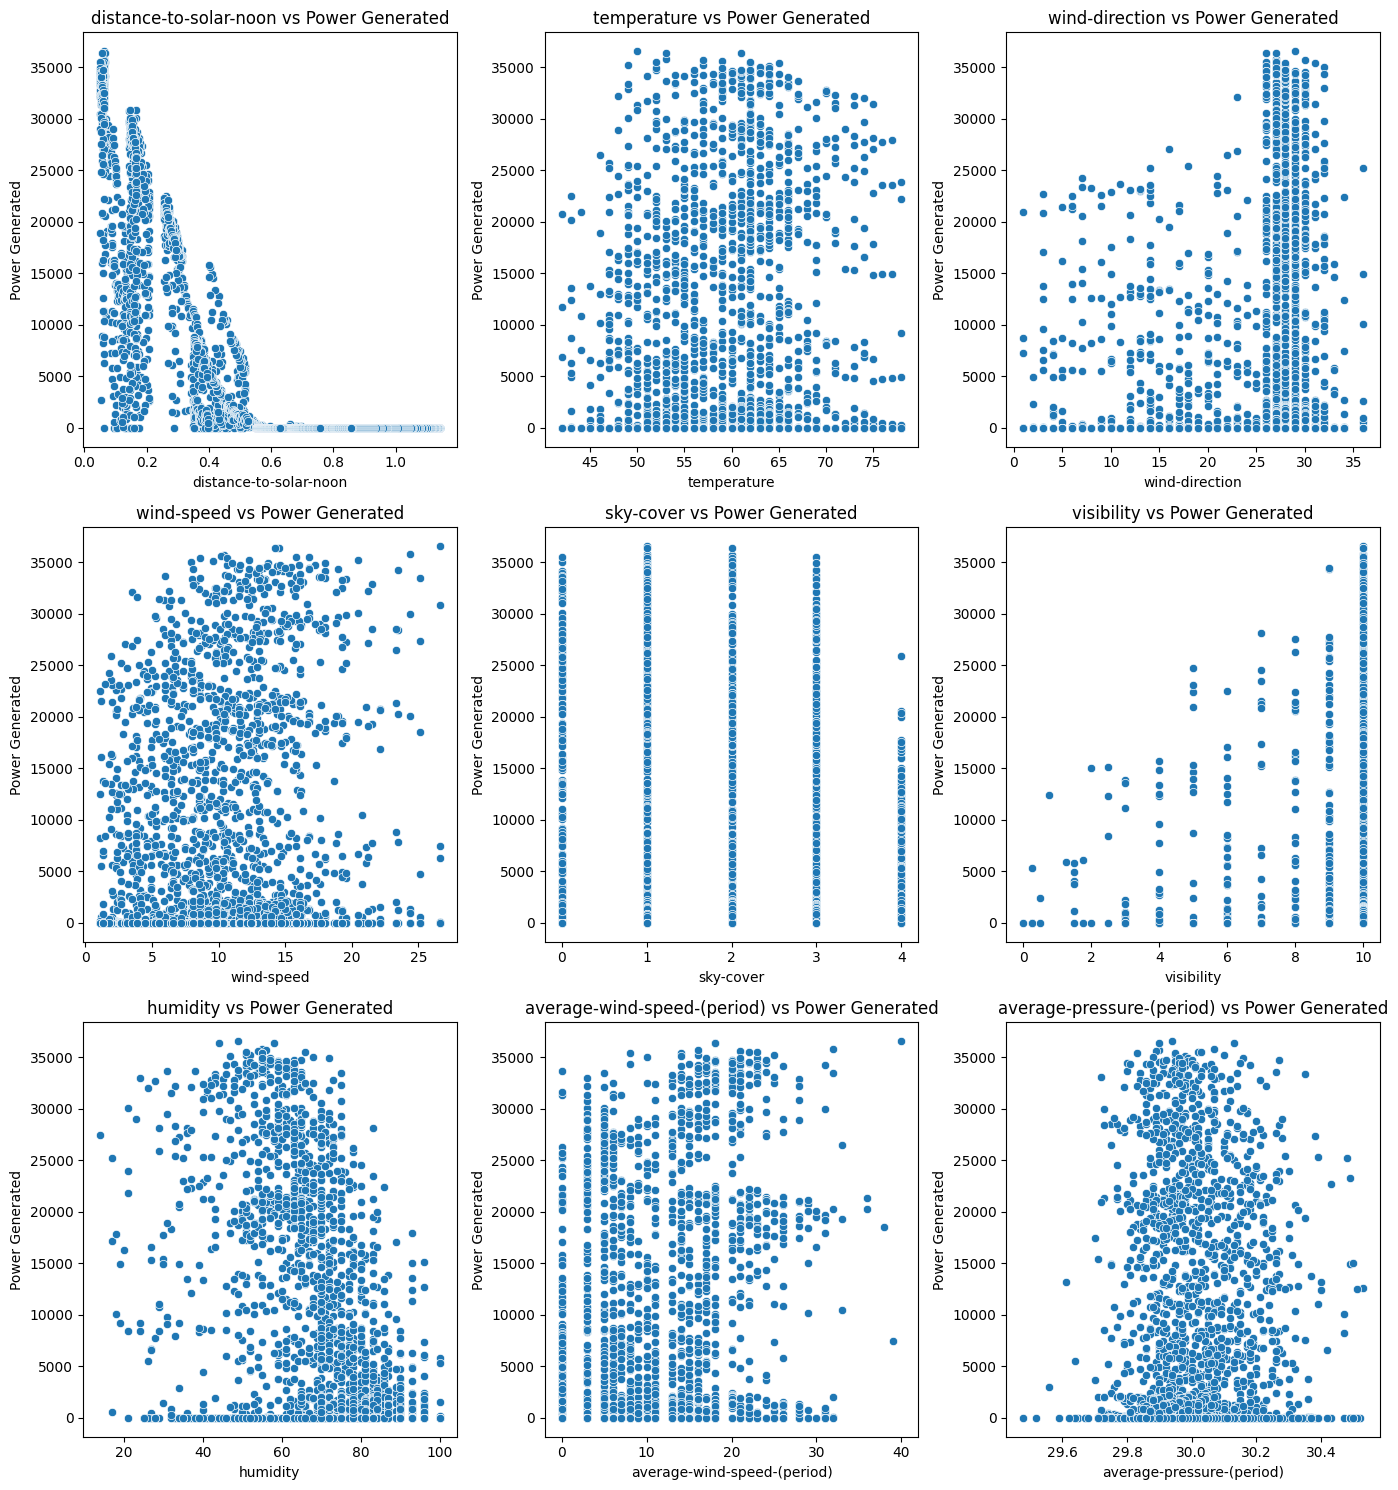

In [82]:
# Create subplots: Adjust rows and cols based on number of numerical_cols
n = len(feature_cols)
cols = 3  # number of columns in subplot grid
rows = (n + cols - 1) // cols  # compute needed rows

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()  # flatten to 1D for easy iteration

for i, col in enumerate(feature_cols):
    sns.scatterplot(x=data[col], y=data['power-generated'], ax=axes[i])
    axes[i].set_title(f'{col} vs Power Generated', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Power Generated', fontsize=10)

# Remove any unused subplots if total plots < rows*cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Power generation is highest near solar noon and under clear atmospheric conditions (low sky cover, high visibility, low humidity), showing strong dependence on solar position and clarity.
Weather variables like wind speed and temperature have weaker, noisier effects, while wind direction and pressure show little influence.

## 1.5.5 Pairwise Analysis for High-Correlated Features

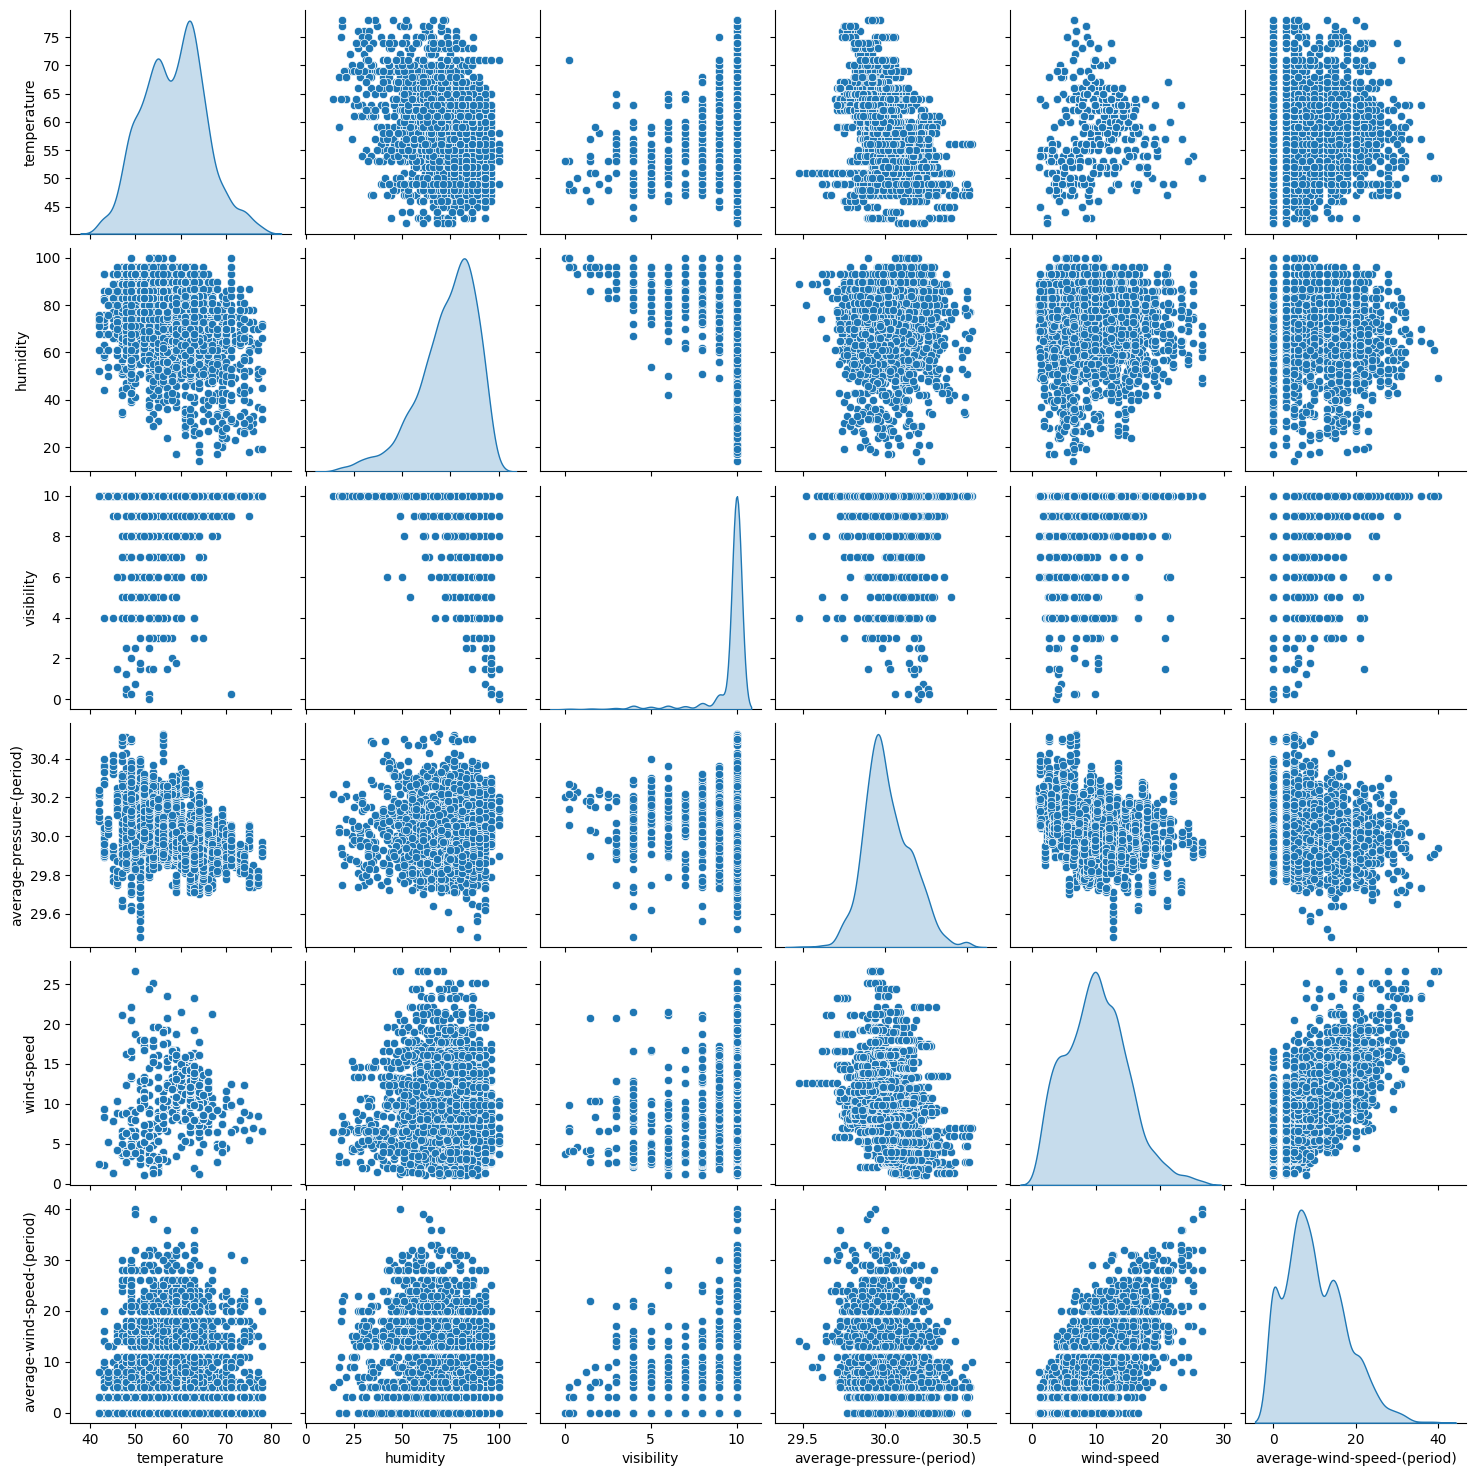

In [70]:
high_corr_cols = ['temperature','humidity','visibility','average-pressure-(period)','wind-speed','average-wind-speed-(period)']
sns.pairplot(data[high_corr_cols], diag_kind='kde')
plt.show()

**Visibility vs Humidity:** Strong inverse pattern—high humidity aligns with low visibility, indicating these variables capture similar atmospheric conditions.
**Average Pressure vs Temperature / Wind Speed:** Pressure shows structured dependence, decreasing slightly with higher temperature and higher wind speeds, contributing to redundancy.
**Wind Speed vs Average Wind Speed (period):** Strong positive linear relationship, confirming they represent overlapping information.

## 1.5.6 Q–Q Plots and Normality Checks

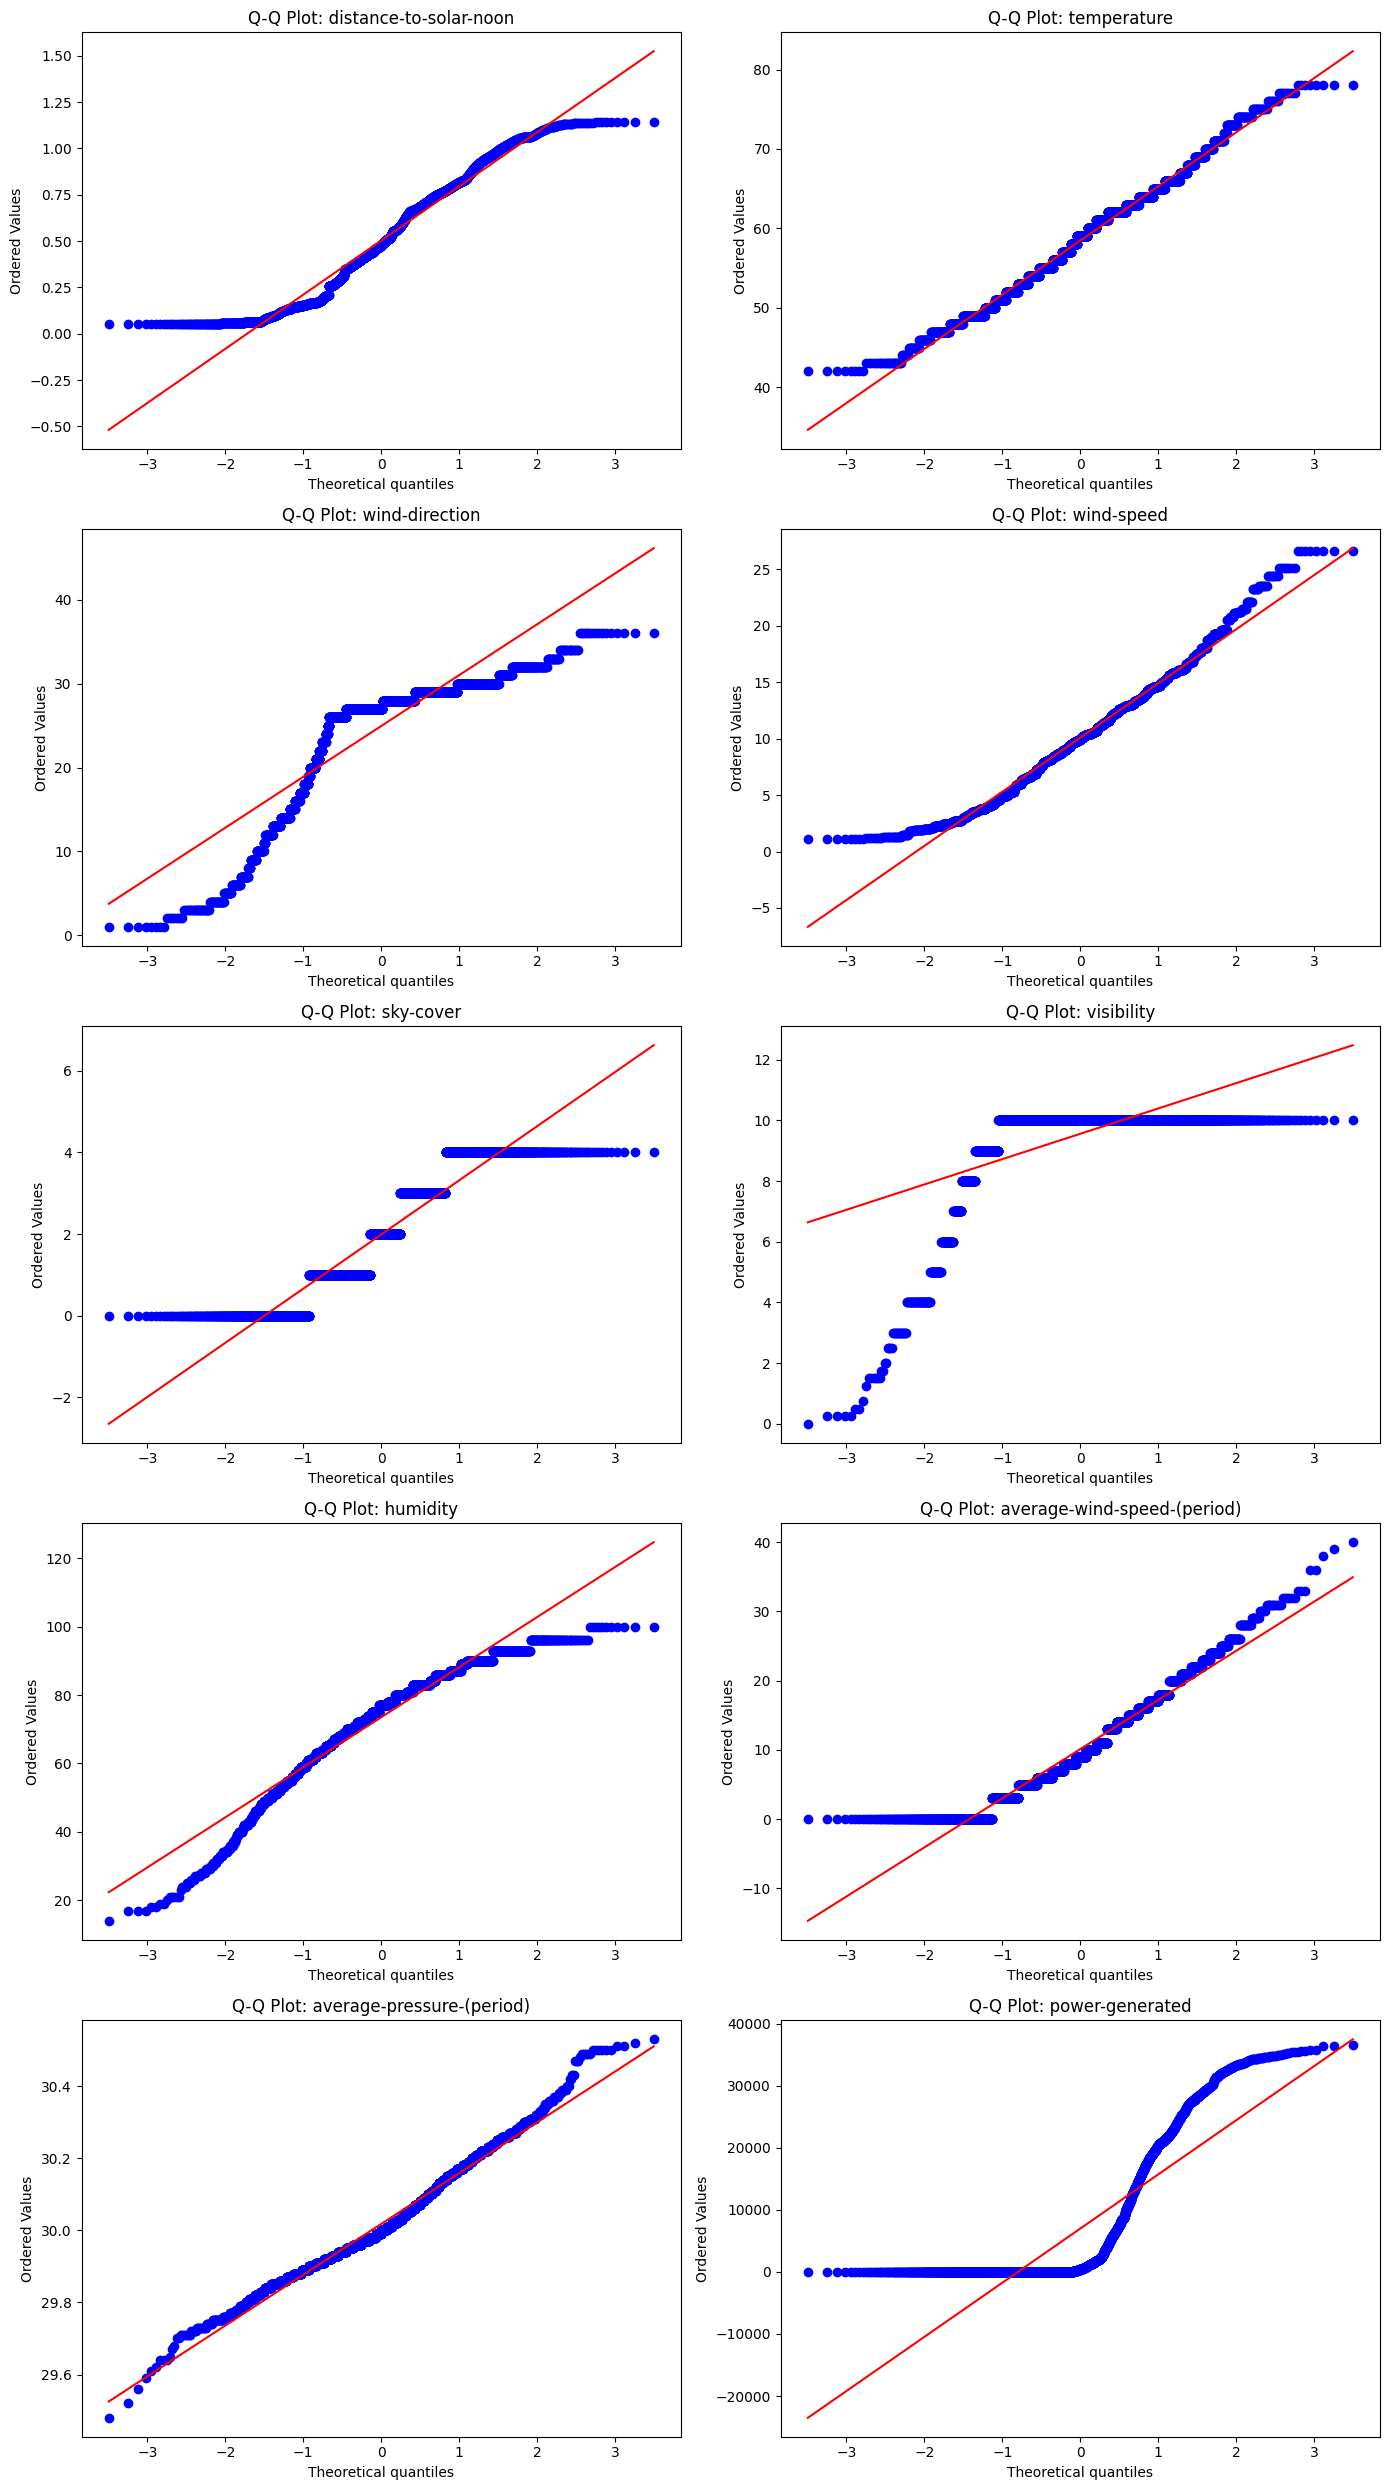

In [71]:
import scipy.stats as stats

numerical_cols = data.columns  # or list of numerical columns
n = len(numerical_cols)
cols = 2  # number of columns in subplot grid
rows = (n + cols - 1) // cols  # compute required rows

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(numerical_cols):
    stats.probplot(data[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}', fontsize=12)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Temperature and average pressure are approximately normally distributed (points follow the straight line well).
Wind speed is mildly skewed, while distance to solar noon shows clear non-normality.
Wind direction, sky cover, visibility, and humidity are non-normal due to circular, discrete, or bounded nature.
Power generated is highly non-normal with zero inflation and strong skewness.

## 1.5.7 Target-Based Binning Analysis

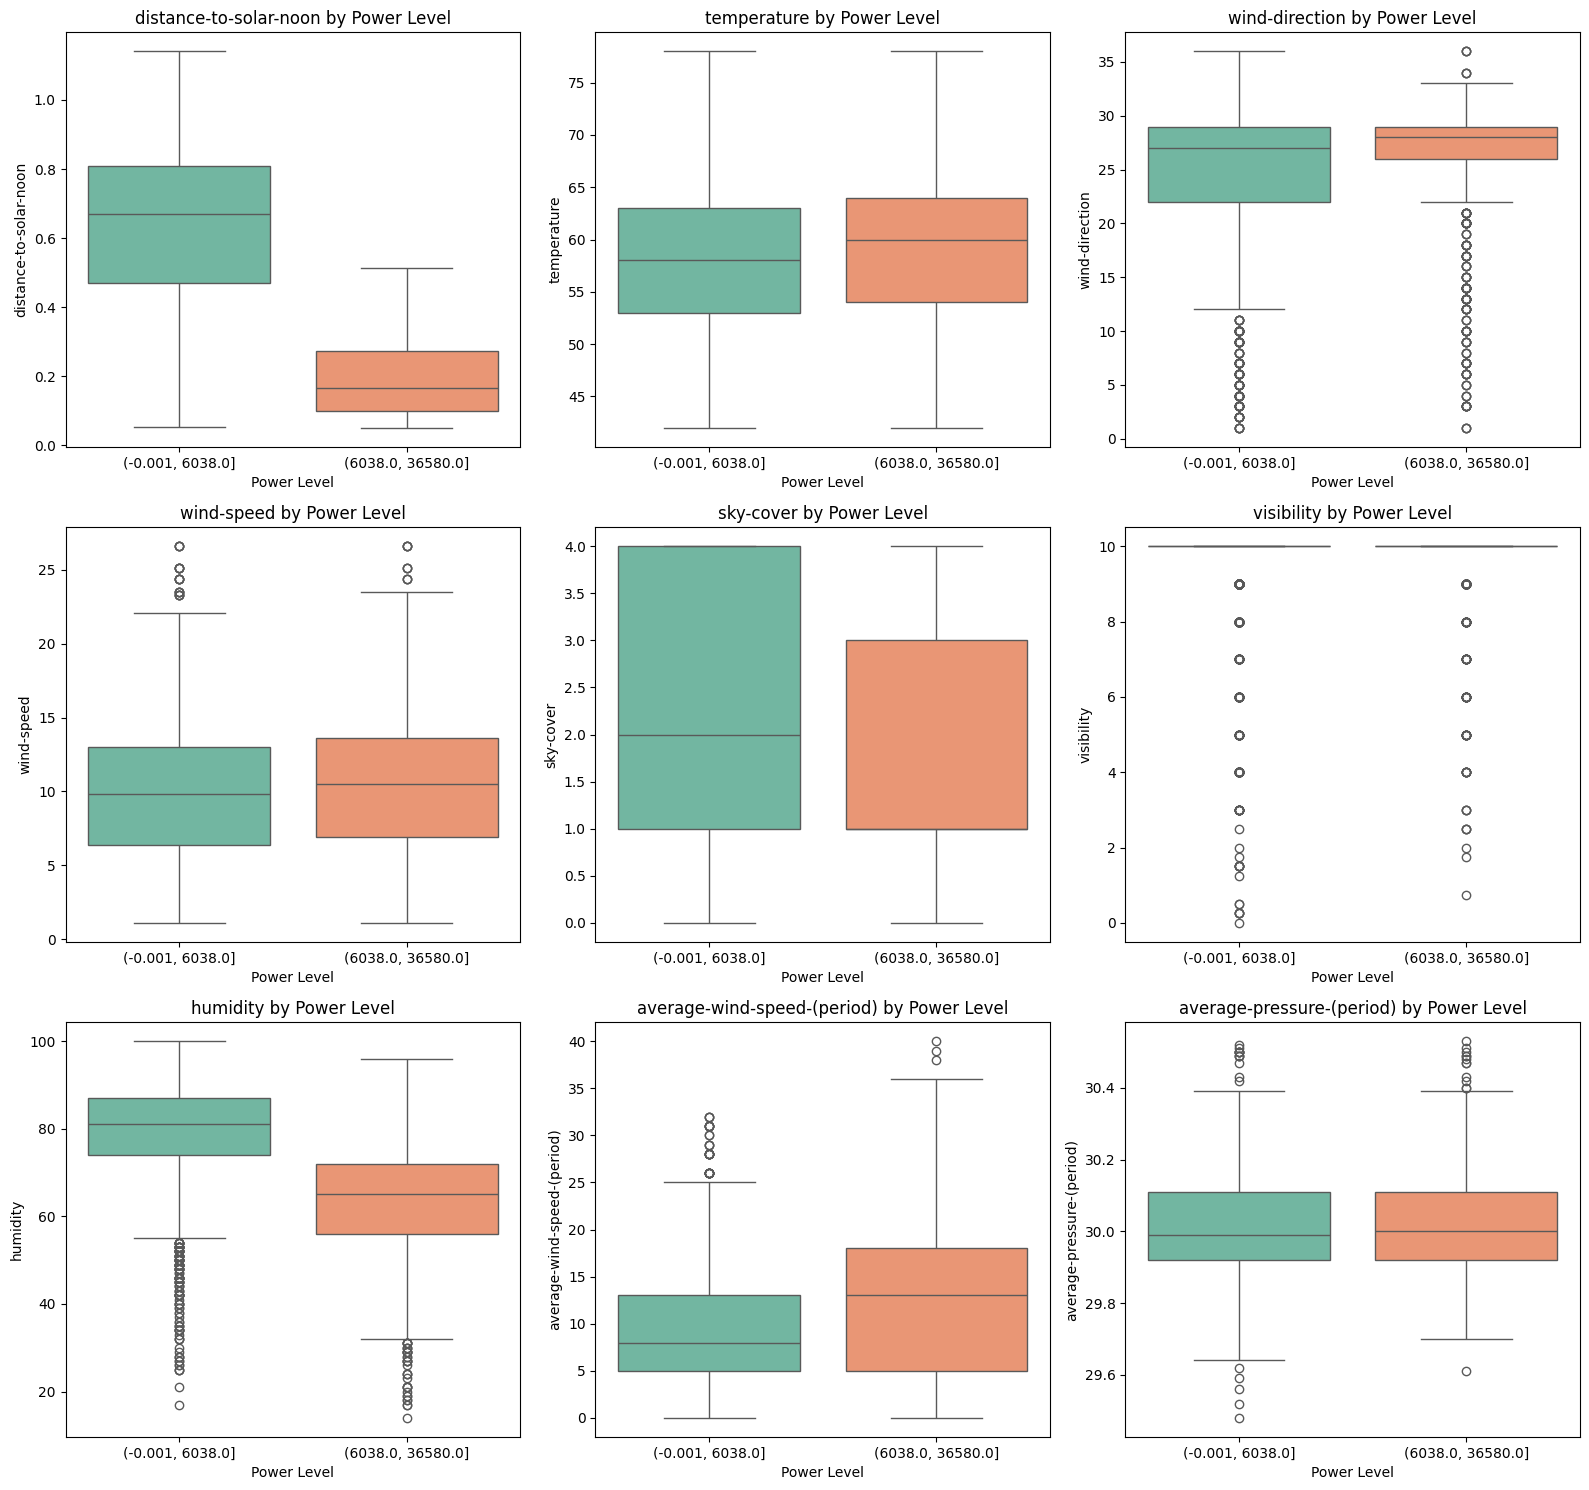

In [85]:
# Bin target variable into 3 categories
df = data.copy()
df['power_bin'] = pd.qcut(df['power-generated'], q=3,duplicates='drop')

numerical_cols = [col for col in df.columns if col not in ['power-generated', 'power_bin']]
n = len(numerical_cols)
cols = 3  # number of columns in subplot grid
rows = (n + cols - 1) // cols  # compute required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*5))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='power_bin', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Power Level', fontsize=12)
    axes[i].set_xlabel('Power Level', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

High power generation occurs closer to solar noon, with clearly lower distance-to-noon values.
Higher power levels are associated with slightly higher temperature, wind speed, and average wind speed.
Lower humidity and marginally clearer sky cover correspond to higher power output.
Pressure, wind direction, and visibility show little separation between low and high power bins, indicating weak influence.

## 1.5.8 PCA for Feature Redundancy (EDA Only)

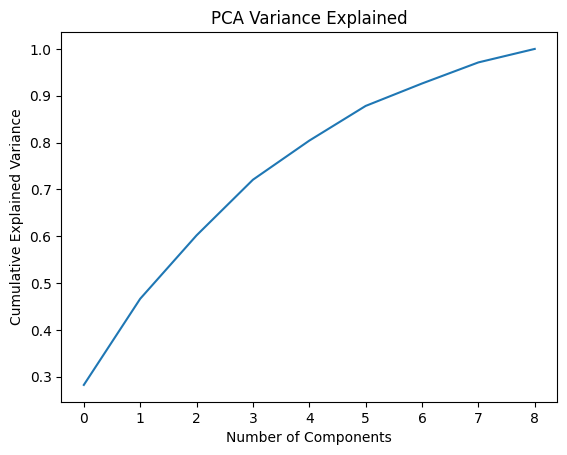

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_scaled = StandardScaler().fit_transform(df.drop(columns=['power-generated','power_bin']))
pca = PCA().fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.show()

The PCA variance explained plot shows how much information (variance) is captured as more principal components are added. The first component alone explains a substantial portion of the variance, indicating strong correlations among the original variables. By the time 3 components are included, about 70% of the total variance is captured, meaning most of the important structure in the data is already retained.

Including up to 5 components increases the explained variance to nearly 90%, after which the curve flattens, showing diminishing returns from additional components. This flattening (elbow) suggests that later components mostly capture noise rather than meaningful patterns. Therefore, PCA effectively reduces dimensionality while preserving essential information.

In practice, retaining 3–5 principal components provides a good balance between model simplicity and performance. Using these components helps reduce multicollinearity, improve computational efficiency, and often enhances model generalization without significant loss of information.

## 1.5.9 Baseline Linear Model & Influence Diagnostics

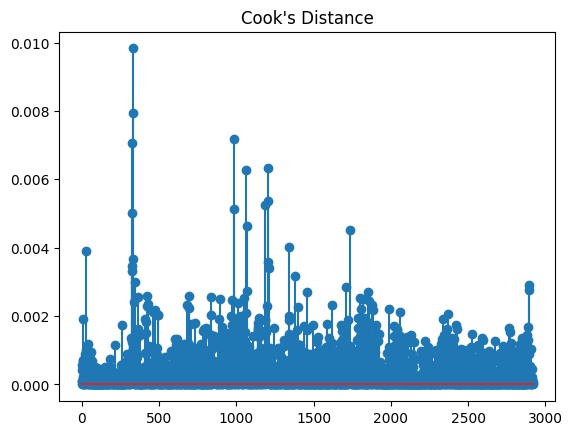

In [74]:
import statsmodels.api as sm
X_base = sm.add_constant(df.drop(columns=['power-generated','power_bin']))
y_base = df['power-generated']
model = sm.OLS(y_base, X_base).fit()
influence = model.get_influence()
cooks = influence.cooks_distance[0]
plt.stem(cooks)
plt.title('Cook\'s Distance')
plt.show()

The baseline linear model appears robust, no single observation dominates the model fit. Influence diagnostics show no dangerously influential observations. Model results can be interpreted with confidence

## 1.5.10 Regression Assumption Diagnostics

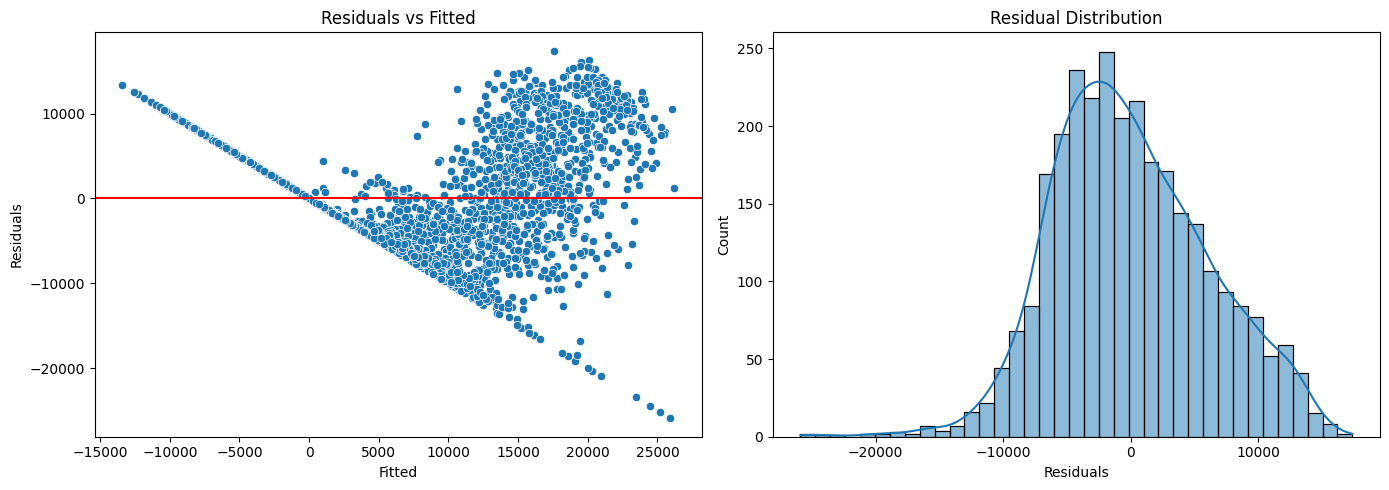

In [75]:
residuals = model.resid
fitted = model.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals vs Fitted
sns.scatterplot(x=fitted, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red')
axes[0].set_title('Residuals vs Fitted')
axes[0].set_xlabel('Fitted')
axes[0].set_ylabel('Residuals')

# Residual Distribution
sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title('Residual Distribution')
axes[1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

The residuals versus fitted plot for the baseline linear model exhibits strong systematic patterns and increasing variance, indicating violations of the linearity and homoscedasticity assumptions. Residuals are not randomly distributed around zero, suggesting that the true relationship between predictors and the response is nonlinear. The presence of structured clusters implies missing nonlinear effects or interactions rather than the influence of individual observations. To address these issues, the response variable should be transformed (e.g., log transformation) to stabilize variance. The model should then be refit using nonlinear terms such as spline functions, with diagnostics reassessed to confirm improved model adequacy.

The residual distribution is approximately unimodal but exhibits noticeable skewness and heavy tails, indicating departures from normality. This suggests that the normal error assumption of the linear model may be violated, reinforcing the need for transformation or alternative modeling approaches.

#### 1.5.11 Display all plots

In [76]:
# All plots have been displayed using plt.show()
print("\nAll visualizations completed!")
print("Analysis phase complete.")


All visualizations completed!
Analysis phase complete.


## **Summary Analysis**

Overall, the analysis indicates that raw linear regression is inappropriate, and the next steps should include log transformation of the target variable for linear models, scaling of features, sine–cosine encoding of wind direction, removal of low-impact variables such as pressure and visibility, Atmospheric pressure and visibility were identified as low-impact variables because they exhibit weak correlation with power generation, and nearly identical distributions across low and high power levels, indicating minimal contribution to predictive performance. optional PCA for linear models, and preference for regularized or non-linear models such as Random Forest or Gradient Boosting to better capture non-linear relationships.

## Analysis Complete!

### Summary of Analysis Phase:
1. **Data Exploration**: Loaded and inspected dataset structure
2. **Missing Values**: Identified and analyzed missing data patterns
3. **Outlier Detection**: Implemented functions to detect, analyze, and report outliers
4. **Visualizations**: Created comprehensive visualization for all feature variables

### Next Step:
Proceed to **preprocessing.ipynb** for data cleaning and preparation for modeling.